In [1]:
import numpy as np

from cConceptualModel import ConceptualModel, AnimatedConceptualModel
from IPython import display

In [2]:
# Hydrogeological information
water_table_depth = 2
target_position = 160  # Moves the x-axis, allowing for negative values
# Geometry
model_height = 60
model_width = 320
# Layer information
number_layers = 3
layer_thickness = [10, 20, 40]
layer_colour = [np.array([185, 122, 87]) / 255,
                np.array([153, 217, 234]) / 255,
                np.array([239, 228, 176]) / 255]
layer_hatching = ["o", "/", "."]
layer_names = ["Overburden", "Mudstone", "Sandstone"]
# Boundary information
no_flow = True
no_flow_position = 150.0
no_flow_thickness = 20.0
no_flow_distance = abs(no_flow_position) - (no_flow_thickness / 2)
# Pump borehole information
abstraction_rate = 345.6
pump_bh_position = 0.0
pump_bh_depth = 50
pump_bh_screen_top = 12
pump_bh_screen_bottom = 50
# Create the space and time arrays
space = [-160, -150, -140, -130, -120, -110, -100, -90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, 
         -20, -18, -16, -14, -12, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -0.1, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 
         25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100, 110, 120, 130, 140, 150, 160]
time = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0007, 0.001, 0.005, 0.008, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
        1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 10.0, 11.0, 12.0, 13.0, 15.0, 17.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 70.0, 80.0, 90.0, 100.0, 
        110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 180.0, 210.0, 230.0, 250.0, 270.0, 290.0, 310.0, 330.0, 350.0, 380.0, 410.0, 440.0, 470.0, 500.0, 
        540.0, 600.0, 660.0, 720.0, 780.0, 840.0, 900.0, 960.0, 1020.0, 1080.0, 1140.0, 1200.0, 1260.0, 1320.0, 1380.0, 1440.0]
# Aquifer parameterisation
storativity = 1E-5
transmissivity = 20

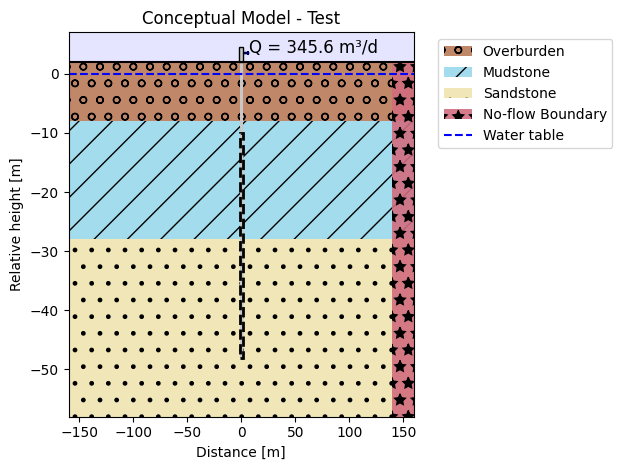

In [3]:
cm = ConceptualModel(model_name="Test",
                     model_width=model_width,
                     model_height=model_height,
                     water_table_depth=water_table_depth,
                     target_position=target_position,
                     number_layers=number_layers)

cm.add_sky()
cm.add_layers(layers_thickness=layer_thickness, layers_colours=layer_colour, layers_hatching=layer_hatching, layer_names=layer_names)

if no_flow:
    cm.add_no_flow(x_position=no_flow_position, thickness=no_flow_thickness)

cm.add_pump_borehole(abstraction_rate=abstraction_rate, well_x_position=pump_bh_position, borehole_depth=pump_bh_depth, 
                     screen_top=pump_bh_screen_top, screen_bottom=pump_bh_screen_bottom)

cm.plot_information()

In [4]:
animated = AnimatedConceptualModel(fig=cm.fig, ax=cm.ax, time=time, space=space, zero_position=target_position, abstraction_rate=abstraction_rate, 
                                   transmissivity=transmissivity, storativity=storativity, no_flow=no_flow, no_flow_distance=no_flow_distance)

In [5]:
animated.create_animation('HardRock_noflow')